In [1]:
import pandas as pd
import numpy as np
import ast

# 모든 행과 열을 출력하도록 설정
pd.set_option('display.max_rows', None)  # 행
pd.set_option('display.max_columns', None)  # 열


### 데이터 업로드

In [2]:
df_portfolio  = pd.read_csv('portfolio.csv')
df_profile  = pd.read_csv('profile.csv')
df_transcript = pd.read_csv('transcript.csv')

for df in [df_portfolio, df_profile, df_transcript]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns='Unnamed: 0', inplace=True)

In [3]:
df_portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
df_profile.sample(3)

,gender,age,id,became_member_on,income
13769,M,35,573b1978dcb242d49f287b15c1c73ab3,20170705,69000.0
10126,F,21,d51d270de949457b901b71a361061879,20140225,50000.0
6375,M,64,fc9a87cbefaf443eb0a17ad7a82d6104,20180622,49000.0


In [5]:
df_transcript.sample(10)

,person,event,value,time
216331,a1edbd2104ae4282996556de41ccc96b,transaction,{'amount': 40.11},504
113051,16c4978e01db484db6b3000a6427f0dd,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},336
119402,7aa4ca53ed8148cda070d75f8ba0e080,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},336
290485,89a8daaab84d46b9ba605584cbef53eb,transaction,{'amount': 25.11},648
4345,e37db063f380473484acfb86046bf5b8,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
36530,6924192984cf4a17ac5e5b1a937af4b2,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},72
198370,6d4a7f37c83c4d158cf5afa0a08a52e9,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},486
105381,9d7ee5485d064f5b8cecc53fe55863ac,transaction,{'amount': 32.26},300
245532,1f3375bf55ad4d6d9fe17395db638f98,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},576
32131,00426fe3ffde4c6b9cb9ad6d077a13ea,transaction,{'amount': 4.74},54


In [6]:
df_portfolio.value_counts()

reward  channels                              difficulty  duration  offer_type     id                              
0       ['email', 'mobile', 'social']         0           3         informational  5a8bc65990b245e5a138643cd4eb9837    1
        ['web', 'email', 'mobile']            0           4         informational  3f207df678b143eea3cee63160fa8bed    1
2       ['web', 'email', 'mobile', 'social']  10          10        discount       fafdcd668e3743c1bb461111dcafc2a4    1
        ['web', 'email', 'mobile']            10          7         discount       2906b810c7d4411798c6938adc9daaa5    1
3       ['web', 'email', 'mobile', 'social']  7           7         discount       2298d6c36e964ae4a3e7e9706d1fb8c2    1
5       ['web', 'email', 'mobile', 'social']  5           5         bogo           f19421c1d4aa40978ebb69ca19b0e20d    1
        ['web', 'email', 'mobile']            5           7         bogo           9b98b8c7a33c4b65b9aebfe6a799e6d9    1
        ['web', 'email']             

### 전처리

#### df_profile


In [7]:
# 1. 이상치 제거: 나이 118세 제거
df_profile = df_profile[df_profile['age'] != 118]

# 2 날짜 타입 변경 : became_member_on → datetime 형식
df_profile['became_member_on'] = pd.to_datetime(df_profile['became_member_on'], format='%Y%m%d')

# 3. 나이 범주화: 10대 ~ 80대, 90세 이상
def age_grouping(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    elif age < 70:
        return '60대'
    elif age < 80:
        return '70대'
    elif age < 90:
        return '80대'
    else:
        return '90세 이상'

df_profile['age_group'] = df_profile['age'].apply(age_grouping)




#### df_transcript

In [8]:
# 1. transcript['value'] 컬럼 분해: 딕셔너리로 변환 후 컬럼화
df_transcript['value'] = df_transcript['value'].apply(ast.literal_eval)

df_transcript['offer_id'] = df_transcript['value'].apply(lambda x: x.get('offer id') or x.get('offer_id'))
df_transcript['reward'] = df_transcript['value'].apply(lambda x: x.get('reward'))
df_transcript['amount'] = df_transcript['value'].apply(lambda x: x.get('amount'))

In [9]:
# reward 컬럼은 지워도 됌

del df_transcript['reward']

In [10]:
df_transcript.head(20)

,person,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,f19421c1d4aa40978ebb69ca19b0e20d,NaN
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0,3f207df678b143eea3cee63160fa8bed,NaN
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN


In [11]:
df_transcript[['offer_id', 'amount']].notnull().sum()

offer_id    167581
amount      138953
dtype: int64

### join

In [12]:
# LEFT JOIN 수행: transcript 기준으로 portfolio 붙이기
df_tp_merged = pd.merge(
    df_transcript,
    df_portfolio,
    how='left',
    left_on='offer_id',
    right_on='id'
)

# 중복 방지용으로 df_portfolio의 'id' 컬럼 제거 (선택)
df_tp_merged = df_tp_merged.drop(columns=['id'])  # 또는 .rename(), .reorder 가능

In [13]:
df_tp_merged[df_tp_merged['event']=='transaction'].head(3)

,person,event,value,time,offer_id,amount,reward,channels,difficulty,duration,offer_type
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,None,0.83,NaN,NaN,NaN,NaN,NaN
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,None,34.56,NaN,NaN,NaN,NaN,NaN
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,None,13.23,NaN,NaN,NaN,NaN,NaN


In [14]:
df_tp_merged[df_tp_merged['event']=='offer completed'].head(3)

,person,event,value,time,offer_id,amount,reward,channels,difficulty,duration,offer_type
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"['web', 'email', 'mobile']",10.0,7.0,discount
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo


In [15]:
df_final = pd.merge(
    df_tp_merged,
    df_profile,
    how='left',
    left_on='person',
    right_on='id'
)

# profile의 'id' 컬럼 제거
df_final = df_final.drop(columns=['id'])  # profile 쪽 id

In [16]:
df_final.head(5)

,person,event,value,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,F,75.0,2017-05-09,100000.0,70대
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,"['web', 'email']",20.0,10.0,discount,NaN,NaN,NaT,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"['web', 'email', 'mobile']",10.0,7.0,discount,M,68.0,2018-04-26,70000.0,60대
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,NaN,NaN,NaT,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,NaN,NaN,NaT,NaN,NaN


In [17]:
df_final.shape

(306534, 16)

In [18]:
df_final = df_final[df_final['age_group'].notnull()]

In [19]:
# del df_final['age']

In [20]:
del df_final['value']

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272762 entries, 0 to 306532
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person            272762 non-null  object        
 1   event             272762 non-null  object        
 2   time              272762 non-null  int64         
 3   offer_id          148805 non-null  object        
 4   amount            123957 non-null  float64       
 5   reward            148805 non-null  float64       
 6   channels          148805 non-null  object        
 7   difficulty        148805 non-null  float64       
 8   duration          148805 non-null  float64       
 9   offer_type        148805 non-null  object        
 10  gender            272762 non-null  object        
 11  age               272762 non-null  float64       
 12  became_member_on  272762 non-null  datetime64[ns]
 13  income            272762 non-null  float64       
 14  age_group

In [22]:
df_final.isnull().sum()

person                   0
event                    0
time                     0
offer_id            123957
amount              148805
reward              123957
channels            123957
difficulty          123957
duration            123957
offer_type          123957
gender                   0
age                      0
became_member_on         0
income                   0
age_group                0
dtype: int64

In [23]:
# df_final.pivot_table(index='person', columns='event', aggfunc='size', fill_value=0)

In [24]:
df_final = df_final.drop_duplicates()

In [25]:
df1 = df_final.copy()

In [26]:
df1.shape

(272388, 15)

In [27]:
df1['event'].value_counts()

event
transaction        123957
offer received      66501
offer viewed        49860
offer completed     32070
Name: count, dtype: int64

In [28]:
# df.to_csv('df.csv', index=False)

In [29]:
df1['offer_type'].value_counts()

offer_type
bogo             63676
discount         62095
informational    22660
Name: count, dtype: int64

In [30]:
df1.shape

(272388, 15)

In [31]:
df1['offer_type'].value_counts()

offer_type
bogo             63676
discount         62095
informational    22660
Name: count, dtype: int64

### offer_type 별 전환율

In [32]:
# 1. 'offer completed' 이후 'offer viewed' 제거
df_offer = df1[df1['event'].isin(['offer received', 'offer viewed', 'offer completed'])].copy()
df_offer = df_offer.sort_values(by=['person', 'offer_id', 'time'])
df_offer['prev_event'] = df_offer.groupby(['person', 'offer_id'])['event'].shift(1)

# 제거할 viewed 이벤트 인덱스
indices_to_exclude = df_offer[
    (df_offer['event'] == 'offer viewed') &
    (df_offer['prev_event'] == 'offer completed')
].index

# 제거된 데이터프레임
df1_filtered = df1.drop(index=indices_to_exclude)

# 2. 고객-오퍼 단위로 이벤트 존재 여부 체크
df_flags = df1_filtered[df1_filtered['event'].isin(['offer received', 'offer viewed', 'offer completed'])].copy()
df_flags['received'] = df_flags['event'] == 'offer received'
df_flags['viewed'] = df_flags['event'] == 'offer viewed'
df_flags['completed'] = df_flags['event'] == 'offer completed'

# 사람+오퍼 기준으로 단 한 번이라도 있었는지 여부 체크
grouped = df_flags.groupby(['person', 'offer_id', 'offer_type'])[['received', 'viewed', 'completed']].any().reset_index()

# 3. offer_type별 집계 및 전환율 계산
pivot = grouped.groupby('offer_type')[['received', 'viewed', 'completed']].sum()

pivot['viewed_rate'] = pivot['viewed'] / pivot['received']
pivot['completion_after_viewed_rate'] = pivot['completed'] / pivot['viewed']
pivot['completion_rate'] = pivot['completed'] / pivot['received']

# 소수점 정리
pivot = pivot.round(4).reset_index()

# 결과 출력
print(pivot[['offer_type', 'viewed_rate', 'completion_after_viewed_rate', 'completion_rate']])


      offer_type  viewed_rate  completion_after_viewed_rate  completion_rate
0           bogo       0.7707                        0.7763           0.5983
1       discount       0.6497                        1.0259           0.6665
2  informational       0.7284                        0.0000           0.0000


In [33]:
# bogo 프로모션 필터링
bogo = df1[df1['offer_type'] == 'bogo']

# 1. 받은 사람 집합
received = bogo[bogo['event'] == 'offer received'][['person', 'offer_id']].drop_duplicates()

# 2. 본 사람 중 받은 사람만
viewed = bogo[bogo['event'] == 'offer viewed'][['person', 'offer_id']].drop_duplicates()
viewed = viewed.merge(received, on=['person', 'offer_id'])

# 3. 완료한 사람 중 본 사람만
completed = bogo[bogo['event'] == 'offer completed'][['person', 'offer_id']].drop_duplicates()
completed = completed.merge(viewed, on=['person', 'offer_id'])

# 4. offer_id별 그룹화
received_counts = received.groupby('offer_id').size().reset_index(name='received_count')
completed_counts = completed.groupby('offer_id').size().reset_index(name='completed_count')

# 병합 및 전환율 계산
result = received_counts.merge(completed_counts, on='offer_id', how='left')
result['completed_count'] = result['completed_count'].fillna(0)
result['CVR'] = (result['completed_count'] / result['received_count']).round(4)

# 평균 전환율 계산
mean_cvr = result['CVR'].mean().round(4)

# 결과 출력
print(result)
print(f"\n📌 bogo 프로모션 전환율의 평균: {mean_cvr}")

                           offer_id  received_count  completed_count     CVR
0  4d5c57ea9a6940dd891ad53e9dbe8da0            5511             2805  0.5090
1  9b98b8c7a33c4b65b9aebfe6a799e6d9            5542             2397  0.4325
2  ae264e3637204a6fb9bb56bc8210ddfd            5564             2813  0.5056
3  f19421c1d4aa40978ebb69ca19b0e20d            5445             3481  0.6393

📌 bogo 프로모션 전환율의 평균: 0.5216


In [34]:
# 전체 통합 전환율
total_cvr = round(len(completed) / len(received), 4)

# 평균 전환율 (위에서 구한 result 사용)
mean_cvr = result['CVR'].mean().round(4)

print("전체 통합 CVR:", total_cvr)
print("offer_id별 평균 CVR:", mean_cvr)

전체 통합 CVR: 0.5211
offer_id별 평균 CVR: 0.5216


In [35]:
promo_types = ['bogo', 'discount', 'informational']
results = {}

for promo in promo_types:
    # 해당 프로모션 유형 필터링
    promo_df = df1[df1['offer_type'] == promo]
    
    # 받은 사람
    received = promo_df[promo_df['event'] == 'offer received'][['person', 'offer_id']].drop_duplicates()
    
    # 완료한 사람 (받은 사람 중)
    completed = promo_df[promo_df['event'] == 'offer completed'][['person', 'offer_id']].drop_duplicates()
    completed = completed.merge(received, on=['person', 'offer_id'])
    
    # offer_id별 수
    received_counts = received.groupby('offer_id').size().reset_index(name='received_count')
    completed_counts = completed.groupby('offer_id').size().reset_index(name='completed_count')
    
    # 병합 및 전환율 계산
    result = received_counts.merge(completed_counts, on='offer_id', how='left')
    result['completed_count'] = result['completed_count'].fillna(0)
    result['CVR'] = (result['completed_count'] / result['received_count']).round(4)
    
    # 평균 전환율 저장
    results[promo] = result['CVR'].mean().round(4)

# 출력
for promo, cvr in results.items():
    print(f"📌 {promo} 프로모션 전환율의 평균: {cvr}")

📌 bogo 프로모션 전환율의 평균: 0.5985
📌 discount 프로모션 전환율의 평균: 0.6667
📌 informational 프로모션 전환율의 평균: 0.0


In [36]:
df1.sample(20)

,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group
189056,2e046f3450bf4307881be2258ad81fcc,transaction,456,None,9.14,NaN,NaN,NaN,NaN,NaN,M,23.0,2016-05-17,68000.0,20대
208658,089d00cfd1fc45258ce97ebd2e4779f8,offer received,504,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,F,85.0,2015-11-30,75000.0,80대
275426,284650de773c461da7dd5c547e5ac590,transaction,606,None,8.18,NaN,NaN,NaN,NaN,NaN,M,51.0,2016-04-30,73000.0,50대
258453,87fbf08570954a3bbbfa53062a68d232,offer viewed,576,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,M,82.0,2018-02-19,50000.0,80대
49876,0a4153113a484ad8bf54b623d9ab3504,transaction,144,None,23.84,NaN,NaN,NaN,NaN,NaN,F,58.0,2017-01-07,83000.0,50대
77708,8ca462f1192b4aa29ac99768d5eefbfa,offer viewed,192,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,"['email', 'mobile', 'social']",10.0,7.0,bogo,M,64.0,2017-05-03,54000.0,60대
83355,aabc003ec0b84f2d848ee244f226a3ac,transaction,204,None,102.72,NaN,NaN,NaN,NaN,NaN,M,59.0,2013-11-24,52000.0,50대
145541,e5c58df69cd246458eb6adc918b9db8d,offer completed,390,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,F,55.0,2013-09-14,95000.0,50대
200020,760786cb5e2d4df1affeb9dc6a3b8e86,transaction,492,None,18.17,NaN,NaN,NaN,NaN,NaN,M,72.0,2015-07-22,75000.0,70대
271359,29655cba61a04d079efde18203b4f232,offer completed,594,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,F,67.0,2016-10-17,101000.0,60대


### 재참여율

In [37]:

# 1. 'offer completed' 이벤트만 필터링
completed = df1[df1['event'] == 'offer completed'][['person', 'offer_type']]

# 2. 고객별로 각 offer_type에 대해 몇 번 완료했는지 계산
completed_counts = completed.groupby(['offer_type', 'person']).size().reset_index(name='count')

# 3. 분모: offer_type별 1회 이상 완료한 고객 수
total_customers = completed_counts.groupby('offer_type')['person'].nunique().reset_index(name='total_customers')

# 4. 분자: offer_type별 2회 이상 완료한 고객 수
repeated_customers = completed_counts[completed_counts['count'] > 1] \
    .groupby('offer_type')['person'].nunique().reset_index(name='repeated_customers')

# 5. 병합 후 재완료율 계산
repeat_rate = total_customers.merge(repeated_customers, on='offer_type', how='left')
repeat_rate['repeated_customers'] = repeat_rate['repeated_customers'].fillna(0).astype(int)
repeat_rate['repeat_rate'] = (repeat_rate['repeated_customers'] / repeat_rate['total_customers']).round(4)

# 결과 출력
print(repeat_rate)

  offer_type  total_customers  repeated_customers  repeat_rate
0       bogo             8914                4343       0.4872
1   discount             9718                5018       0.5164


### 프로모션 응답시간 구하기

In [38]:
# df1 = 이미 offer_type이 붙어 있는 상태의 전체 데이터프레임이라고 가정
# df1에는 'person', 'offer_id', 'event', 'time', 'offer_type'가 존재해야 함

# 1. person + offer_id 기준으로 이벤트/시간/offer_type을 리스트로 모음
grouped_data = df1.groupby(['person', 'offer_id'])[['event', 'time', 'offer_type']].agg(list).reset_index()

# 2. offer completed가 1개 이상인 경우만 필터링
grouped_data = grouped_data[grouped_data['event'].apply(lambda x: x.count('offer completed') >= 1)]

# 3. 시간차 계산 함수 정의
def calculate_time_diff(row):
    try:
        time_received = row['time'][row['event'].index('offer received')]
        time_completed = row['time'][row['event'].index('offer completed')]
        return time_completed - time_received
    except ValueError:
        return None  # 'offer received' 또는 'offer completed'가 없을 경우

# 4. 시간차 계산
grouped_data['time_diff'] = grouped_data.apply(calculate_time_diff, axis=1)

# 5. offer_type 리스트 → 단일값으로 변환
grouped_data['offer_type_single'] = grouped_data['offer_type'].apply(lambda x: x[0] if isinstance(x, list) and x else None)

# 6. offer_type별 평균 시간차 계산
average_time_diff = grouped_data.dropna(subset=['time_diff']) \
                                .groupby('offer_type_single')['time_diff'] \
                                .mean() \
                                .round(2)

# 결과 출력
print(average_time_diff)

offer_type_single
bogo        64.80
discount    82.85
Name: time_diff, dtype: float64


In [39]:
df1[df1['person'] == '2deb5383c1af41029f861cb3b56e2e4f']

,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group
18995,2deb5383c1af41029f861cb3b56e2e4f,transaction,12,None,19.67,NaN,NaN,NaN,NaN,NaN,M,46.0,2015-08-03,55000.0,40대
34701,2deb5383c1af41029f861cb3b56e2e4f,transaction,66,None,6.72,NaN,NaN,NaN,NaN,NaN,M,46.0,2015-08-03,55000.0,40대
58499,2deb5383c1af41029f861cb3b56e2e4f,offer received,168,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,"['email', 'mobile', 'social']",10.0,7.0,bogo,M,46.0,2015-08-03,55000.0,40대
73316,2deb5383c1af41029f861cb3b56e2e4f,offer viewed,180,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,"['email', 'mobile', 'social']",10.0,7.0,bogo,M,46.0,2015-08-03,55000.0,40대
75833,2deb5383c1af41029f861cb3b56e2e4f,transaction,186,None,14.20,NaN,NaN,NaN,NaN,NaN,M,46.0,2015-08-03,55000.0,40대
75834,2deb5383c1af41029f861cb3b56e2e4f,offer completed,186,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,"['email', 'mobile', 'social']",10.0,7.0,bogo,M,46.0,2015-08-03,55000.0,40대
78160,2deb5383c1af41029f861cb3b56e2e4f,transaction,192,None,17.41,NaN,NaN,NaN,NaN,NaN,M,46.0,2015-08-03,55000.0,40대
91232,2deb5383c1af41029f861cb3b56e2e4f,transaction,234,None,11.36,NaN,NaN,NaN,NaN,NaN,M,46.0,2015-08-03,55000.0,40대
95647,2deb5383c1af41029f861cb3b56e2e4f,transaction,252,None,16.14,NaN,NaN,NaN,NaN,NaN,M,46.0,2015-08-03,55000.0,40대
96936,2deb5383c1af41029f861cb3b56e2e4f,transaction,258,None,13.76,NaN,NaN,NaN,NaN,NaN,M,46.0,2015-08-03,55000.0,40대


### 채널별

In [40]:
# 원본 보존
df2 = df1[df1['event'] != 'transaction'].copy()

### NEW !!
df3 = df1[df1['event'] == 'transaction'].copy()

# 채널 컬럼의 데이터 형식 변경: 문자열 -> 리스트
import ast

df2['channels'] = df2['channels'].apply(ast.literal_eval)

# 채널 개수 컬럼 추가
df2['num_of_channels'] = df2['channels'].apply(lambda x: len(x))

# 채널 조합별 구분해주는 컬럼 추가

import numpy as np

conditions = [
    (df2['channels'].apply(lambda x: x == ['web', 'email'])),
    (df2['channels'].apply(lambda x: x == ['email', 'mobile', 'social'])),
    (df2['channels'].apply(lambda x: x == ['web', 'email', 'mobile'])),
    (df2['channels'].apply(lambda x: x == ['web', 'email', 'mobile', 'social'])),
]

choices = [0, 1, 2, 3]

df2['channels_combinations'] = np.select(conditions, choices, default=0)

df2.shape


(148431, 17)

In [41]:
# # 1. 받은 사람만 추출
# received = df2[df2['event'] == 'offer received'][['person', 'offer_id', 'num_of_channels']].drop_duplicates()

# # 2. 완료한 사람 추출
# completed = df2[df2['event'] == 'offer completed'][['person', 'offer_id']].drop_duplicates()

# # 3. 완료 중 받은 사람만
# completed = completed.merge(received, on=['person', 'offer_id'])

# # 4. num_of_channels 기준 집계
# received_counts = received.groupby('num_of_channels').size().reset_index(name='received_count')
# completed_counts = completed.groupby('num_of_channels').size().reset_index(name='completed_count')

# # 5. 병합 및 CVR 계산
# result = received_counts.merge(completed_counts, on='num_of_channels', how='left')
# result['completed_count'] = result['completed_count'].fillna(0)
# result['CVR'] = (result['completed_count'] / result['received_count']).round(4)

# # 6. 출력
# result.sort_values('num_of_channels')

### 채널개수별 응답률, 재참여율, 응답시간

In [42]:
# 1. 응답률 계산
received = df2[df2['event'] == 'offer received'][['person', 'offer_id', 'num_of_channels']].drop_duplicates()
completed = df2[df2['event'] == 'offer completed'][['person', 'offer_id']].drop_duplicates()

# 받은 사람 중 완료한 사람
completed = completed.merge(received, on=['person', 'offer_id'])

# 응답률 계산
received_counts = received.groupby('num_of_channels').size().reset_index(name='received_count')
completed_counts = completed.groupby('num_of_channels').size().reset_index(name='completed_count')

result = received_counts.merge(completed_counts, on='num_of_channels', how='left')
result['completed_count'] = result['completed_count'].fillna(0).astype(int)
result['CVR'] = (result['completed_count'] / result['received_count']).round(4)

# 2. 재응답률 계산
completed_full = df2[df2['event'] == 'offer completed'][['person', 'offer_id', 'num_of_channels']]

# 유저+오퍼 기준 응답 횟수
completed_counts_all = completed_full.groupby(['num_of_channels', 'person']).size().reset_index(name='count')

# 분모: 각 채널수 별 1회 이상 완료한 유저 수
total_customers = completed_counts_all.groupby('num_of_channels')['person'].nunique().reset_index(name='total_customers')

# 분자: 2회 이상 완료한 유저 수
repeated_customers = completed_counts_all[completed_counts_all['count'] > 1] \
    .groupby('num_of_channels')['person'].nunique().reset_index(name='repeated_customers')

# 병합 및 재응답률 계산
repeat_rate = total_customers.merge(repeated_customers, on='num_of_channels', how='left')
repeat_rate['repeated_customers'] = repeat_rate['repeated_customers'].fillna(0).astype(int)
repeat_rate['repeat_rate'] = (repeat_rate['repeated_customers'] / repeat_rate['total_customers']).round(4)

# 3. 응답시간 계산
# 👉 여기서 num_of_channels는 리스트로 안 묶이게 따로 처리
grouped = df2.groupby(['person', 'offer_id']).agg({
    'event': list,
    'time': list,
    'num_of_channels': 'first'  # 리스트 대신 첫 값만
}).reset_index()

# 'offer completed'가 1번 이상 있는 경우만 필터링
grouped = grouped[grouped['event'].apply(lambda x: x.count('offer completed') >= 1)]

# 응답시간 계산 함수
def calculate_time_diff(row):
    try:
        time_received = row['time'][row['event'].index('offer received')]
        time_completed = row['time'][row['event'].index('offer completed')]
        return time_completed - time_received
    except ValueError:
        return None

grouped['time_diff'] = grouped.apply(calculate_time_diff, axis=1)

# 평균 응답시간 계산
response_time_summary = grouped.dropna(subset=['time_diff']) \
                               .groupby('num_of_channels')['time_diff'] \
                               .mean().reset_index().round(2)

response_time_summary.rename(columns={'time_diff': 'avg_response_time'}, inplace=True)

# 4. 세 지표 병합
final = result.merge(repeat_rate[['num_of_channels', 'repeat_rate']], on='num_of_channels', how='left')
final = final.merge(response_time_summary, on='num_of_channels', how='left')
final = final.sort_values('num_of_channels').reset_index(drop=True)

# 5. 출력
print(final.to_string(index=False))

 num_of_channels  received_count  completed_count    CVR  repeat_rate  avg_response_time
               2            5588             2944 0.5268       0.1168             117.76
               3           27627            10156 0.3676       0.3813              73.89
               4           22007            14842 0.6744       0.5070              66.00


### 채널 조합별 응답률, 재참여율, 응답시간

In [43]:
# 1. 응답률 계산
received = df2[df2['event'] == 'offer received'][['person', 'offer_id', 'channels_combinations']].drop_duplicates()
completed = df2[df2['event'] == 'offer completed'][['person', 'offer_id']].drop_duplicates()

# 받은 사람 중 완료한 사람
completed = completed.merge(received, on=['person', 'offer_id'])

# 응답률 계산
received_counts = received.groupby('channels_combinations').size().reset_index(name='received_count')
completed_counts = completed.groupby('channels_combinations').size().reset_index(name='completed_count')

result = received_counts.merge(completed_counts, on='channels_combinations', how='left')
result['completed_count'] = result['completed_count'].fillna(0).astype(int)
result['CVR'] = (result['completed_count'] / result['received_count']).round(4)

# 2. 재응답률 계산
completed_full = df2[df2['event'] == 'offer completed'][['person', 'offer_id', 'channels_combinations']]

# 유저+오퍼 기준 응답 횟수
completed_counts_all = completed_full.groupby(['channels_combinations', 'person']).size().reset_index(name='count')

# 분모: 각 조합별 1회 이상 완료한 유저 수
total_customers = completed_counts_all.groupby('channels_combinations')['person'].nunique().reset_index(name='total_customers')

# 분자: 2회 이상 완료한 유저 수
repeated_customers = completed_counts_all[completed_counts_all['count'] > 1] \
    .groupby('channels_combinations')['person'].nunique().reset_index(name='repeated_customers')

# 병합 및 재응답률 계산
repeat_rate = total_customers.merge(repeated_customers, on='channels_combinations', how='left')
repeat_rate['repeated_customers'] = repeat_rate['repeated_customers'].fillna(0).astype(int)
repeat_rate['repeat_rate'] = (repeat_rate['repeated_customers'] / repeat_rate['total_customers']).round(4)

# 3. 응답시간 계산
grouped = df2.groupby(['person', 'offer_id']).agg({
    'event': list,
    'time': list,
    'channels_combinations': 'first'  # 리스트 대신 첫 값
}).reset_index()

# 'offer completed'가 1번 이상 있는 경우만 필터링
grouped = grouped[grouped['event'].apply(lambda x: x.count('offer completed') >= 1)]

# 응답시간 계산 함수
def calculate_time_diff(row):
    try:
        time_received = row['time'][row['event'].index('offer received')]
        time_completed = row['time'][row['event'].index('offer completed')]
        return time_completed - time_received
    except ValueError:
        return None

grouped['time_diff'] = grouped.apply(calculate_time_diff, axis=1)

# 평균 응답시간 계산
response_time_summary = grouped.dropna(subset=['time_diff']) \
                               .groupby('channels_combinations')['time_diff'] \
                               .mean().reset_index().round(2)

response_time_summary.rename(columns={'time_diff': 'avg_response_time'}, inplace=True)

# 4. 세 지표 병합
final = result.merge(repeat_rate[['channels_combinations', 'repeat_rate']], on='channels_combinations', how='left')
final = final.merge(response_time_summary, on='channels_combinations', how='left')
final = final.sort_values('channels_combinations').reset_index(drop=True)

# 5. 채널 조합 이름 붙이기
combo_labels = {
    0: 'web+email',
    1: 'email+mobile+social',
    2: 'web+email+mobile',
    3: 'web+email+mobile+social'
}

final['채널 조합'] = final['channels_combinations'].map(combo_labels)

# 필요 없는 컬럼 제거 + 컬럼 순서 정리
final = final[['channels_combinations', '채널 조합', 'CVR', 'repeat_rate', 'avg_response_time']]


# 6. 출력
print(final.to_string(index=False))

 channels_combinations                   채널 조합    CVR  repeat_rate  avg_response_time
                     0               web+email 0.5268       0.1168             117.76
                     1     email+mobile+social 0.2839       0.1345              68.42
                     2        web+email+mobile 0.4237       0.2617              76.35
                     3 web+email+mobile+social 0.6744       0.5070              66.00


### 채널 개수별 - 조합별 응답률, 재참여율, 응답시간

In [44]:
# 0. 조합 ID 정의 및 df2에 추가
combination_id_map = {
    (2, 0): 0,
    (3, 1): 1,
    (3, 2): 2,
    (4, 3): 3
}

df2['num_comb_id'] = df2.apply(
    lambda row: combination_id_map.get((row['num_of_channels'], row['channels_combinations']), -1),
    axis=1
)

# 1. 응답률 계산
received = df2[df2['event'] == 'offer received'][['person', 'offer_id', 'num_of_channels', 'channels_combinations']].drop_duplicates()
completed = df2[df2['event'] == 'offer completed'][['person', 'offer_id']].drop_duplicates()

# 받은 사람 중 완료한 사람
completed = completed.merge(received, on=['person', 'offer_id'])

# 응답률 집계
received_counts = received.groupby(['num_of_channels', 'channels_combinations']).size().reset_index(name='received_count')
completed_counts = completed.groupby(['num_of_channels', 'channels_combinations']).size().reset_index(name='completed_count')

result = received_counts.merge(completed_counts, on=['num_of_channels', 'channels_combinations'], how='left')
result['completed_count'] = result['completed_count'].fillna(0).astype(int)
result['CVR'] = (result['completed_count'] / result['received_count']).round(4)

# 2. 재응답률 계산
completed_full = df2[df2['event'] == 'offer completed'][['person', 'offer_id', 'num_of_channels', 'channels_combinations']]
completed_counts_all = completed_full.groupby(['num_of_channels', 'channels_combinations', 'person']) \
                                     .size().reset_index(name='count')

total_customers = completed_counts_all.groupby(['num_of_channels', 'channels_combinations']) \
                                      ['person'].nunique().reset_index(name='total_customers')

repeated_customers = completed_counts_all[completed_counts_all['count'] > 1] \
    .groupby(['num_of_channels', 'channels_combinations']) \
    ['person'].nunique().reset_index(name='repeated_customers')

repeat_rate = total_customers.merge(repeated_customers, on=['num_of_channels', 'channels_combinations'], how='left')
repeat_rate['repeated_customers'] = repeat_rate['repeated_customers'].fillna(0).astype(int)
repeat_rate['repeat_rate'] = (repeat_rate['repeated_customers'] / repeat_rate['total_customers']).round(4)

# 3. 응답시간 계산
grouped = df2.groupby(['person', 'offer_id']).agg({
    'event': list,
    'time': list,
    'num_of_channels': 'first',
    'channels_combinations': 'first'
}).reset_index()

grouped = grouped[grouped['event'].apply(lambda x: x.count('offer completed') >= 1)]

def calculate_time_diff(row):
    try:
        time_received = row['time'][row['event'].index('offer received')]
        time_completed = row['time'][row['event'].index('offer completed')]
        return time_completed - time_received
    except ValueError:
        return None

grouped['time_diff'] = grouped.apply(calculate_time_diff, axis=1)

response_time_summary = grouped.dropna(subset=['time_diff']) \
    .groupby(['num_of_channels', 'channels_combinations'])['time_diff'] \
    .mean().reset_index().round(2)

response_time_summary.rename(columns={'time_diff': 'avg_response_time'}, inplace=True)

# 4. 결과 병합
final = result.merge(repeat_rate[['num_of_channels', 'channels_combinations', 'repeat_rate']],
                     on=['num_of_channels', 'channels_combinations'], how='left')
final = final.merge(response_time_summary,
                    on=['num_of_channels', 'channels_combinations'], how='left')


# 5. 조합_ID 다시 붙이기 
final['num_comb_id'] = final.apply(
    lambda row: combination_id_map.get((row['num_of_channels'], row['channels_combinations']), -1),
    axis=1
)

# 6. 컬럼 정리 및 출력
final = final[['num_comb_id', 'num_of_channels', 'channels_combinations',
               'CVR', 'repeat_rate', 'avg_response_time']]
final = final.sort_values('num_comb_id').reset_index(drop=True)

# 최종 출력
print(final.to_string(index=False))

 num_comb_id  num_of_channels  channels_combinations    CVR  repeat_rate  avg_response_time
           0                2                      0 0.5268       0.1168             117.76
           1                3                      1 0.2839       0.1345              68.42
           2                3                      2 0.4237       0.2617              76.35
           3                4                      3 0.6744       0.5070              66.00


In [45]:
df2['num_comb_id'].value_counts().sort_index()

num_comb_id
0    12247
1    28704
2    38420
3    69060
Name: count, dtype: int64

In [46]:
df_portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [47]:
df_portfolio['channels'].value_counts()

channels
['web', 'email', 'mobile', 'social']    4
['web', 'email', 'mobile']              3
['email', 'mobile', 'social']           2
['web', 'email']                        1
Name: count, dtype: int64

In [48]:
df2.shape

(148431, 18)

### offer_id별 응답률, 재참여율, 반응시간

In [49]:
# 0. 원하는 순서대로 offer_idx 지정
ordered_offer_ids = [
    'ae264e3637204a6fb9bb56bc8210ddfd',
    '4d5c57ea9a6940dd891ad53e9dbe8da0',
    '3f207df678b143eea3cee63160fa8bed',
    '9b98b8c7a33c4b65b9aebfe6a799e6d9',
    '0b1e1539f2cc45b7b9fa7c272da2e1d7',
    '2298d6c36e964ae4a3e7e9706d1fb8c2',
    'fafdcd668e3743c1bb461111dcafc2a4',
    '5a8bc65990b245e5a138643cd4eb9837',
    'f19421c1d4aa40978ebb69ca19b0e20d',
    '2906b810c7d4411798c6938adc9daaa5'
]
offer_id_map = {oid: idx for idx, oid in enumerate(ordered_offer_ids)}
df2['offer_idx'] = df2['offer_id'].map(offer_id_map)

# 1. 응답률 계산
received = df2[df2['event'] == 'offer received'][['person', 'offer_id', 'offer_idx']].drop_duplicates()
completed = df2[df2['event'] == 'offer completed'][['person', 'offer_id']].drop_duplicates()
completed = completed.merge(received, on=['person', 'offer_id'])

received_counts = received.groupby('offer_idx').size().reset_index(name='received_count')
completed_counts = completed.groupby('offer_idx').size().reset_index(name='completed_count')

result = received_counts.merge(completed_counts, on='offer_idx', how='left')
result['completed_count'] = result['completed_count'].fillna(0).astype(int)
result['CVR'] = (result['completed_count'] / result['received_count']).round(4)

# 2. 재참여율 계산
completed_full = df2[df2['event'] == 'offer completed'][['person', 'offer_id', 'offer_idx']]
completed_counts_all = completed_full.groupby(['offer_idx', 'person']).size().reset_index(name='count')

total_customers = completed_counts_all.groupby('offer_idx')['person'].nunique().reset_index(name='total_customers')
repeated_customers = completed_counts_all[completed_counts_all['count'] > 1] \
    .groupby('offer_idx')['person'].nunique().reset_index(name='repeated_customers')

repeat_rate = total_customers.merge(repeated_customers, on='offer_idx', how='left')
repeat_rate['repeated_customers'] = repeat_rate['repeated_customers'].fillna(0).astype(int)
repeat_rate['repeat_rate'] = (repeat_rate['repeated_customers'] / repeat_rate['total_customers']).round(4)

# 3. 응답시간 계산
grouped = df2.groupby(['person', 'offer_id']).agg({
    'event': list,
    'time': list,
    'offer_idx': 'first'
}).reset_index()

grouped = grouped[grouped['event'].apply(lambda x: x.count('offer completed') >= 1)]

def calculate_time_diff(row):
    try:
        time_received = row['time'][row['event'].index('offer received')]
        time_completed = row['time'][row['event'].index('offer completed')]
        return time_completed - time_received
    except ValueError:
        return None

grouped['time_diff'] = grouped.apply(calculate_time_diff, axis=1)

response_time_summary = grouped.dropna(subset=['time_diff']) \
    .groupby('offer_idx')['time_diff'] \
    .mean().reset_index().round(2)

response_time_summary.rename(columns={'time_diff': 'avg_response_time'}, inplace=True)

# 4. 결과 병합
final = result.merge(repeat_rate[['offer_idx', 'repeat_rate']], on='offer_idx', how='left')
final = final.merge(response_time_summary, on='offer_idx', how='left')

# 5. 컬럼 정리 및 출력
final = final[['offer_idx', 'CVR', 'repeat_rate', 'avg_response_time']]
final = final.sort_values('offer_idx').reset_index(drop=True)

print(final.to_string(index=False))

 offer_idx    CVR  repeat_rate  avg_response_time
         0 0.5654       0.1345              68.42
         1 0.5199       0.1358              58.48
         2 0.0000          NaN                NaN
         3 0.6545       0.1332              73.81
         4 0.5268       0.1168             117.76
         5 0.7567       0.1493              66.51
         6 0.7662       0.1537              77.68
         7 0.0000          NaN                NaN
         8 0.6542       0.1328              57.52
         9 0.6173       0.1309              79.07


In [50]:
df2.shape

(148431, 19)

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123957 entries, 12654 to 306532
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person            123957 non-null  object        
 1   event             123957 non-null  object        
 2   time              123957 non-null  int64         
 3   offer_id          0 non-null       object        
 4   amount            123957 non-null  float64       
 5   reward            0 non-null       float64       
 6   channels          0 non-null       object        
 7   difficulty        0 non-null       float64       
 8   duration          0 non-null       float64       
 9   offer_type        0 non-null       object        
 10  gender            123957 non-null  object        
 11  age               123957 non-null  float64       
 12  became_member_on  123957 non-null  datetime64[ns]
 13  income            123957 non-null  float64       
 14  age_g

In [52]:
df3 = df3[['person', 'event', 'time', 'amount', 'gender', 'became_member_on', 'income', 'age_group']]
# 'age',

In [53]:
df3.to_csv('transaction.csv', index=False)

In [54]:
df3.shape

(123957, 8)

In [55]:
df3.sample(10)

,person,event,time,amount,gender,became_member_on,income,age_group
139101,716975ce1c6d4ea68b135158ece95bdd,transaction,366,0.18,M,2014-09-14,59000.0,20대
25323,8db6b535086043c8ad6e919f513d1ce5,transaction,30,13.05,F,2016-03-30,55000.0,80대
73097,ae5f3528d8324fcbbdbc51cf8a46cffa,transaction,180,4.76,F,2017-06-01,54000.0,20대
86747,b25250db635840a994a37dc1d7e7ab59,transaction,216,27.33,M,2017-01-16,77000.0,40대
101374,9f6e1a67b0cf4a38964452db825f1a7e,transaction,276,2.96,M,2018-07-20,51000.0,30대
66145,9e3f177afd7a4d939d486f79e4bfeeb6,transaction,168,24.79,M,2017-02-23,80000.0,50대
142154,13032878f513409bb503d79069bd8779,transaction,378,3.92,M,2017-12-20,53000.0,20대
139333,dbe19b5259b24f48adfd641e048a2648,transaction,366,9.64,M,2017-04-08,58000.0,60대
105486,9491470e780e4dc8ab82ef25d85aa4f8,transaction,300,25.94,F,2017-04-23,77000.0,30대
306150,1a2c6fd57fad4250b35c1b0903ed34ea,transaction,714,6.51,F,2013-12-07,59000.0,60대


In [56]:
df2.to_csv('df2.csv', index=False)

In [57]:
df2.sample(3)

,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group,num_of_channels,channels_combinations,num_comb_id,offer_idx
63506,e0af2ef4dfab40c49c196311195efc60,offer received,168,5a8bc65990b245e5a138643cd4eb9837,NaN,0.0,"[email, mobile, social]",0.0,3.0,informational,M,21.0,2017-08-09,74000.0,20대,3,1,1,7
128882,a4e14694c84c4601990dba55a2729841,offer viewed,342,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,"[email, mobile, social]",10.0,7.0,bogo,M,61.0,2018-04-14,67000.0,60대,3,1,1,0
8857,6155e0b447074e4a98c4b78e26686246,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"[web, email, mobile]",5.0,7.0,bogo,F,84.0,2016-10-06,97000.0,80대,3,2,2,3


In [58]:
df3.sample(3)

,person,event,time,amount,gender,became_member_on,income,age_group
292985,1a85ed00b630425aba646b057c6b0f18,transaction,654,4.92,M,2015-01-31,47000.0,20대
264844,4e5ad0392a914bbb9c421d4e00746862,transaction,582,1.39,M,2018-01-16,74000.0,40대
129157,60c1304c8cee4e1fac2d0e094957b1a8,transaction,342,22.00,F,2016-09-09,81000.0,40대


In [59]:
df1.sample(10)

,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group
173586,e6ed082e2f7a4f9f94466b7fdb560f05,offer completed,420,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"['web', 'email', 'mobile']",10.0,7.0,discount,F,65.0,2016-01-18,74000.0,60대
178097,a13d12b423c0443cbaa3815ce04ed056,offer completed,432,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,M,27.0,2017-11-29,45000.0,20대
86680,ef0e2201ac374894a5e00336e52aea1e,transaction,216,None,18.15,NaN,NaN,NaN,NaN,NaN,O,89.0,2016-09-09,81000.0,80대
233818,398a7192ff1f4667b7489399788debf3,transaction,540,None,19.73,NaN,NaN,NaN,NaN,NaN,M,67.0,2017-09-21,56000.0,60대
208788,40d8739cf2ac400d85efe192c3b41a34,offer received,504,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,F,24.0,2018-07-04,39000.0,20대
99704,a3d2267a2d1f4eaabd6869c07b03cdf6,transaction,270,None,3.27,NaN,NaN,NaN,NaN,NaN,M,67.0,2017-04-17,38000.0,60대
195053,b7a66e629b134079a9bc7120c7b9947b,transaction,480,None,11.85,NaN,NaN,NaN,NaN,NaN,M,44.0,2017-09-24,35000.0,40대
148448,eeb1816aa0bd47fca44cc96531bc913a,offer viewed,396,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,"['email', 'mobile', 'social']",10.0,7.0,bogo,M,34.0,2016-09-22,31000.0,30대
67925,313b01db6d7441d8814cd7926e114b34,offer viewed,168,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"['web', 'email', 'mobile']",10.0,7.0,discount,M,69.0,2016-07-11,61000.0,60대
155982,4f499c198dc2449fb30e7cb82af2ea42,offer received,408,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,3.0,"['web', 'email', 'mobile', 'social']",7.0,7.0,discount,F,66.0,2017-05-17,75000.0,60대


In [60]:
df2['person'].nunique()

14820

In [61]:
df3['person'].nunique()

14492

In [62]:
# # 공통 person ID 구하기
# common_ids = set(df2['person']) & set(df3['person'])

# # 결과를 리스트로
# common_ids_list = list(common_ids)

# # 개수 확인
# print(f"겹치는 person ID 수: {len(common_ids)}")

In [63]:
import pandas as pd

# 1. 연령대 재범주화
age_map = {
    '10대': '10-20대',
    '20대': '10-20대',
    '30대': '30-40대',
    '40대': '30-40대',
    '50대': '50-60대',
    '60대': '50-60대',
    '70대': '70대 이상',
    '80대': '70대 이상',
    '90세 이상': '70대 이상'
}
df2['age_group_custom'] = df2['age_group'].map(age_map)

# 2. 'offer completed' 이벤트만 필터링
completed_full = df2[df2['event'] == 'offer completed'][['person', 'offer_id', 'age_group_custom']]

# 3. 유저+오퍼 기준 완료 횟수 계산
completed_counts_all = completed_full.groupby(['age_group_custom', 'person']) \
    .size().reset_index(name='count')

# 4. 분모: 각 연령대별 1회 이상 완료한 유저 수
total_customers = completed_counts_all.groupby('age_group_custom')['person'] \
    .nunique().reset_index(name='total_customers')

# 5. 분자: 2회 이상 완료한 유저 수
repeated_customers = completed_counts_all[completed_counts_all['count'] > 1] \
    .groupby('age_group_custom')['person'] \
    .nunique().reset_index(name='repeated_customers')

# 6. 병합 및 재참여율 계산
repeat_rate = total_customers.merge(repeated_customers, on='age_group_custom', how='left')
repeat_rate['repeated_customers'] = repeat_rate['repeated_customers'].fillna(0).astype(int)
repeat_rate['repeat_rate'] = (repeat_rate['repeated_customers'] / repeat_rate['total_customers']).round(4)

# 7. 정렬
repeat_rate = repeat_rate.sort_values('age_group_custom').reset_index(drop=True)

# 8. 출력
print(repeat_rate.to_string(index=False))

age_group_custom  total_customers  repeated_customers  repeat_rate
          10-20대             1110                 764       0.6883
          30-40대             2975                2232       0.7503
          50-60대             5503                4374       0.7948
          70대 이상             2398                1942       0.8098


In [64]:
# 1. 연령대 그룹 재범주화
age_map = {
    '10대': '10-20대',
    '20대': '10-20대',
    '30대': '30-40대',
    '40대': '30-40대',
    '50대': '50-60대',
    '60대': '50-60대',
    '70대': '70대 이상',
    '80대': '70대 이상',
    '90세 이상': '70대 이상'
}
df2['age_group_custom'] = df2['age_group'].map(age_map)

# 2. 'offer completed' 이벤트만 필터링
completed_full = df2[df2['event'] == 'offer completed'][['person', 'offer_id', 'age_group_custom', 'gender']]

# 3. 유저+오퍼 기준 완료 횟수 계산
completed_counts_all = completed_full.groupby(['age_group_custom', 'gender', 'person']) \
    .size().reset_index(name='count')

# 4. 분모: 각 그룹별 1회 이상 완료한 유저 수
total_customers = completed_counts_all.groupby(['age_group_custom', 'gender'])['person'] \
    .nunique().reset_index(name='total_customers')

# 5. 분자: 각 그룹별 2회 이상 완료한 유저 수
repeated_customers = completed_counts_all[completed_counts_all['count'] > 1] \
    .groupby(['age_group_custom', 'gender'])['person'] \
    .nunique().reset_index(name='repeated_customers')

# 6. 병합 및 재참여율 계산
repeat_rate_gender = total_customers.merge(repeated_customers, on=['age_group_custom', 'gender'], how='left')
repeat_rate_gender['repeated_customers'] = repeat_rate_gender['repeated_customers'].fillna(0).astype(int)
repeat_rate_gender['repeat_rate'] = (repeat_rate_gender['repeated_customers'] / repeat_rate_gender['total_customers']).round(4)

# 7. 정렬 및 출력
repeat_rate_gender = repeat_rate_gender.sort_values(['age_group_custom', 'gender']).reset_index(drop=True)
print(repeat_rate_gender.to_string(index=False))

age_group_custom gender  total_customers  repeated_customers  repeat_rate
          10-20대      F              364                 281       0.7720
          10-20대      M              736                 476       0.6467
          10-20대      O               10                   7       0.7000
          30-40대      F             1122                 935       0.8333
          30-40대      M             1797                1254       0.6978
          30-40대      O               56                  43       0.7679
          50-60대      F             2631                2190       0.8324
          50-60대      M             2790                2117       0.7588
          50-60대      O               82                  67       0.8171
          70대 이상      F             1274                1075       0.8438
          70대 이상      M             1093                 841       0.7694
          70대 이상      O               31                  26       0.8387


In [65]:
df3.sample(3)

,person,event,time,amount,gender,became_member_on,income,age_group
109624,dd90730950e5475e948e04232c67bea9,transaction,324,1.18,M,2017-10-25,40000.0,80대
133175,c6bab8832fd043e5b81dc5f0b587ec6d,transaction,354,18.33,F,2016-11-23,84000.0,50대
88908,018b8f83176d471db63d9733c741fc8a,transaction,228,18.57,F,2018-05-02,109000.0,70대


In [66]:
# df3['age'].mean()

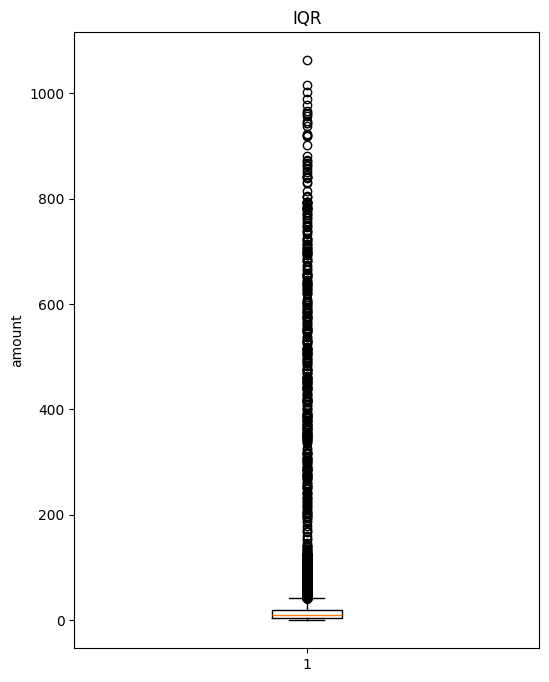

이상치 개수: 1001개
이상치 비율: 0.81%


In [67]:
# amount 이상치 확인
# 태블로에 넣은 transaction 파일로 진행 
# 이유: IQR 기준으로 박스플롯 그릴 때 결측치 없어야 함

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# transaction 파일 사용

# IQR
Q1 = df3['amount'].quantile(0.25)
Q3 = df3['amount'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(df3['amount'])
# plt.xlabel('customer')
plt.ylabel('amount')
plt.title('IQR')
plt.show()

# 이상치 개수 확인
outliers = df3[(df3['amount'] < lower_bound) | (df3['amount'] > upper_bound)]
print(f"이상치 개수: {len(outliers)}개")
print(f"이상치 비율: {len(outliers) / len(df3) * 100:.2f}%")